# 1. Reading Data

In [1]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from fastai.imports import *
# from fastai.structured import *
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
# from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

Using TensorFlow backend.


In [27]:
#reading data
df = pd.read_csv("/Users/rakeshravi/Downloads/UCI_Credit_Card.csv")
df["MARRIAGE"].replace([0], 3, inplace=True)
df["EDUCATION"].replace([0,5,6], 4, inplace=True)
collist = ['AGE','SEX','EDUCATION','MARRIAGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for col in collist:
    df[col] = df[col].astype('category',copy=False)

In [28]:
#data prep for Neural Network

#converting sex, marriage, age and education into one-hot
df = pd.get_dummies(df)
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
y = df["default"]
df = df.drop(["default"], axis = 1)

#train and test splitting
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train_IDs = X_train["ID"]
X_train_s = X_train.drop(["ID"], axis = 1)
X_valid_IDs = X_valid["ID"]
X_valid_s = X_valid.drop(["ID"], axis = 1)

#standardising training and testing datasets to ensure that features are normalized
X_train = StandardScaler().fit_transform(X_train)
X_valid = StandardScaler().fit_transform(X_valid)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Model 1 - Logistic Regression

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


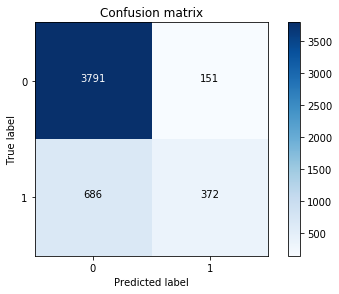

precision: 71.1281070745698
recall: 35.16068052930057
false positive rate: 3.830542871638762
accuracy: 83.26
F1-score: 0.47058823529411764
AUC: 0.656650688288309


In [29]:
#cross validation
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
m.fit(X_train, y_train)


#confusion Matrix
cm = confusion_matrix(y_valid, m.predict(X_valid))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, m.predict(X_valid))
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy:",  accuracy*100)
print("F1-score:", F1)
print("AUC:", roc_auc)

## Model 2 - Random Forest

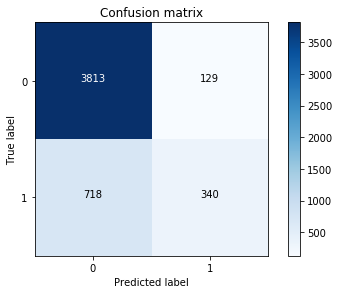

precision: 72.49466950959487
recall: 32.136105860113425
false positive rate: 3.272450532724505
accuracy: 83.06
F1-score: 0.44531761624099536
AUC: 0.6443182766369446


In [33]:
#Random Forest
m = RandomForestClassifier(n_estimators=500, min_samples_leaf=100, max_features=0.5, n_jobs=-1, max_depth=5)
m.fit(X_train, y_train)

#confusion Matrix
cm = confusion_matrix(y_valid, m.predict(X_valid))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, m.predict(X_valid))
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy:",  accuracy*100)
print("F1-score:", F1)
print("AUC:", roc_auc)

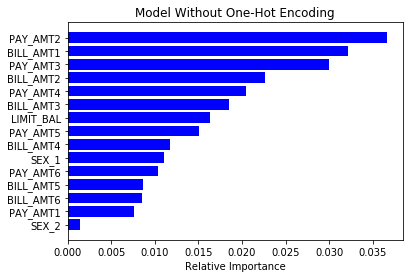

In [32]:
#feature importance from Random Forest
features = X_train_s.columns
importances = m.feature_importances_[0:15]
indices = np.argsort(importances)
plt.title('Model Without One-Hot Encoding')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model 3 - Gradient Boosting Classifier

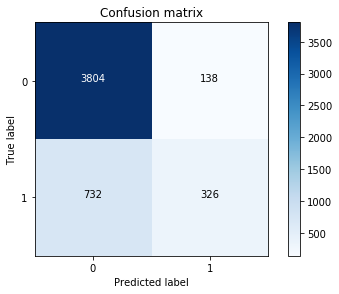

precision: 70.25862068965517
recall: 30.812854442344044
false positive rate: 3.50076103500761
accuracy: 82.6
F1-score: 0.42838370565045997
AUC: 0.6365604670366822


In [34]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
m = GradientBoostingClassifier(n_estimators=2000, min_samples_leaf=200, max_features=0.5)
m.fit(X_train, y_train)

#confusion Matrix
cm = confusion_matrix(y_valid, m.predict(X_valid))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, m.predict(X_valid))
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy:",  accuracy*100)
print("F1-score:", F1)
print("AUC:", roc_auc)